# The Understand data science for machine learning learning path
https://learn.microsoft.com/en-us/training/paths/understand-machine-learning/

## Mod 01: Introduction to machine learning
https://learn.microsoft.com/en-us/training/modules/introduction-to-machine-learning/

Date: 2024-09-22

#### Notes

### Introduction
https://learn.microsoft.com/en-us/training/modules/introduction-to-machine-learning/1-introduction

### What are machine learning models?
https://learn.microsoft.com/en-us/training/modules/introduction-to-machine-learning/2-what-are-ml-models

### Exercise - Create a machine learning model
https://learn.microsoft.com/en-us/training/modules/introduction-to-machine-learning/3-exercise-create-ml-model

We've learned that models are computer code that processes information to make a prediction or a decision. Here, we train a model to guess a comfortable boot size for a dog, based on the size of the harness that fits it.

In the following examples, there's no need to edit any code. Try to read it, understand it, then press the Run button to run it. As always with these notebooks, it's vitally important that these code blocks are run in the correct order, and nothing is missed.

#### Preparing data

In [2]:
import pandas
import wget


In [3]:
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
wget.download('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py')
print('downloaded graphing.py')


downloaded graphing.py


In [10]:
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv
wget.download('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv')
print ('downloaded doggy-boot-harness.csv')


downloaded doggy-boot-harness.csv


In [12]:
# !pip install statsmodels


In [6]:
# Make a dictionary of data for boot sizes
# and harness sizes in cm
data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40, 
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41, 
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37, 
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}

# Convert it into a table using pandas
dataset = pandas.DataFrame(data)

# Print the data
# In normal python we would write
# print(dataset)
# but in Jupyter notebooks, we simply write the name
# of the variable and it is printed nicely 
dataset.head()


,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57


We want to use harness size to estimate boot size. This means harness_size is our input. We want a model that will process the input and make its own estimations of the boot size (output).

#### Select a model

The first thing we need to do is select a model. We're just getting started, so let's start with a very simple model called OLS. This is just a straight line (sometimes called a trendline).

Let's use an existing library to create our model, but we won't train it yet.

In [7]:
# Load a library to do the hard work for us
import statsmodels.formula.api as smf

# First, we define our formula using a special syntax
# This says that boot_size is explained by harness_size
formula = 'boot_size ~ harness_size'

# Create the model, but don't train it yet
model = smf.ols(formula  = formula, data = dataset)

# Note that we have created our model but it does not 
# have internal parameters set yet
if not hasattr(model, 'params'):
    print("model selected but it does not have parameters set. We need to train it.")



model selected but it does not have parameters set. We need to train it.


#### Train our model
OLS models have two parameters (a slope and an offset), but these haven't been set in our model yet. We need to train (fit) our model to find these values so that the model can reliably estimate dogs' boot size based on their harness size.

The following code fits our model to data you've now seen:

In [17]:
# Train (fit) the model so that it creates a line that 
# fits our data. This method does the hard work for
# us. We will look at how this method works in a later unit.
fitted_model = model.fit()

# Print information about our model now it has been fit
print('The followng model parameters have been found:\n'+
      f'Line slope: {fitted_model.params.iloc[1]}\n'+
      f'Line intercept: {fitted_model.params.iloc[0]}')


The followng model parameters have been found:
Line slope: 0.5859254167382717
Line intercept: 5.719109812682555


Notice how training the model set its parameters. We could interpret these directly, but it's simpler to see it as a graph:

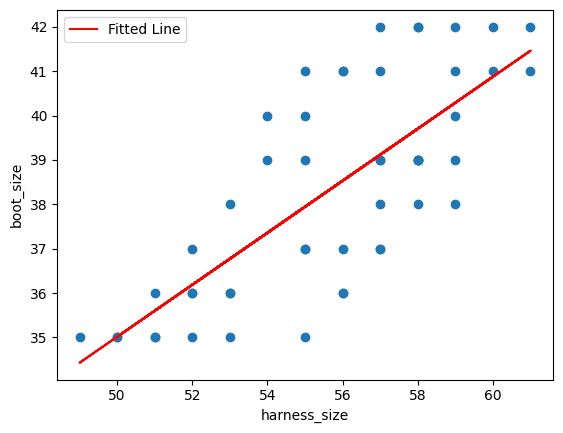

In [20]:
import matplotlib.pyplot as plt

# Show a scatter plot of the data points and add the fitted line
# Don't worry about how this works for now
plt.scatter(dataset['harness_size'], dataset['boot_size'])
plt.plot(dataset['harness_size'], fitted_model.params.iloc[1] * dataset['harness_size'] + fitted_model.params.iloc[0], 'r', label= 'Fitted Line')

#add labels and legends
plt.xlabel('harness_size')
plt.ylabel('boot_size')
plt.legend()


The preceding graph shows our original data as circles with a red line through it. The red line shows our model.

We can look at this line to understand our model. For example, we can see that as harness size increases, so does the estimated boot size.

#### Use the model
Now that we've finished training, we can use our model to predict a dog's boot size from their harness size.

For example, by looking at the red line, we can see that that a harness size of 52.5 (x axis) corresponds to a boot size of about 36.5 (y axis).

We don't have to do this by eye, though. We can use the model in our program to predict any boot size we like.

In [25]:
# harness_size states the size of the harness we are interested in
harness_size = { 'harness_size' : [60]}

# Use the model to predict what size of boots the dog will fit
approximate_boot_size = fitted_model.predict(harness_size)

#print the result
print(f'Estimated approximate_boot_size: {round(approximate_boot_size[0], 1)}')


Estimated approximate_boot_size: 40.9


### What are inputs and outputs?
https://learn.microsoft.com/en-us/training/modules/introduction-to-machine-learning/4-understand-training

The goal of training is to improve a model so that it can make high-quality estimations or predictions. Once trained, you can use a model in the real world like normal software.

Models don't train themselves. They're trained using data plus two pieces of code, the **objective function** and the **optimizer**. Let's explore how these components work together to train a model to work well.


#### **The objective**<br>
The objective is what we want the model to be able to do. For example, our scenario's objective is to be able to estimate a dog's boot size based on their harness size.

For a computer to understand our objective, we need to provide our goal as a code snippet called an **objective function (also known as a cost function)**. Objective functions judge whether the model is doing a good job (estimating boot size well) or bad job (estimating boot size badly). We cover objective functions in more depth in later learning material.

#### **The data**<br>
Data refers to the information that we provide to the model (also known as inputs). In our scenario, the input is harness size.

Data also refers to information that the objective function might need. For example, if our objective function reports whether the model guessed the boot size correctly, it needs to know the correct boot size! For this reason, in our previous exercise, we provided both harness sizes and the correct answers to the training code.

We'll practice working with data in the next exercise.

#### **The optimizer**<br>
During training, the model makes a prediction, and the objective function calculates how well it performed. The optimizer is code that then changes the model's parameters so the model will do a better job next time.

How an optimizer adjusts the parameters is complex, and something we cover in later material. Don't be intimidated, though; we don't normally write our own optimizers, we use open-source frameworks where the hard work has been done for us.

It's important to keep in mind that the objective, data, and optimizer are simply a means to train the model. They aren't needed once training is complete. It's also important to remember that training only changes the parameter values inside of a model; it doesn't change what kind of model is used.

### Exercise - Visualize inputs and outputs
https://learn.microsoft.com/en-us/training/modules/introduction-to-machine-learning/5-exercise-improve-models

#### Load data with Pandas

In [33]:
# Read the text file containing data using pandas
dataset = pandas.read_csv('doggy-boot-harness.csv')

# Print the data
# Because there are a lot of data, use head() to only print the first few rows
dataset.head()


,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


#### Filter data by Columns

In [30]:
# Look at the harness sizes
# print(f'Haress sizes: {dataset.harness_size}')
print("Harness sizes")
print(dataset.harness_size.head())


Harness sizes
0    58
1    58
2    52
3    58
4    57
Name: harness_size, dtype: int64


In [34]:
# Remove the sex and age-in-years columns.
del dataset['sex']
del dataset['age_years']
dataset.head()


,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57


In [36]:
# Print the column names
print("\nAvailable columns after deleting sex and age information:")
print(dataset.columns.values)



Available columns after deleting sex and age information:
['boot_size' 'harness_size']


#### Filter data by Rows

In [37]:
# Print how many rows of data we have
print(f"We have {len(dataset)} rows of data")

# Determine whether each avalanche dog's harness size is < 55
# This creates a True or False value for each row where True means 
# they are smaller than 55
is_small = dataset.harness_size < 55
print("\nWhether the dog's harness was smaller than size 55:")
print(is_small)

# Now apply this 'mask' to our data to keep the smaller dogs
data_from_small_dogs = dataset[is_small]
print("\nData for dogs with harness smaller than size 55:")
print(data_from_small_dogs)

# Print the number of small dogs
print(f"\nNumber of dogs with harness size less than 55: {len(data_from_small_dogs)}")


We have 50 rows of data

Whether the dog's harness was smaller than size 55:
0     False
1     False
2      True
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23     True
24    False
25     True
26     True
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
Name: harness_size, dtype: bool

Data for dogs with harness smaller than size 55:
    boot_size  harness_size
2          37            52
5          35            52
7          36            53
8          35            49
9          40            54
12         38            53
17         36            51
18         35    

This looks like a lot of code, but we can compress the important parts into a single line.

Let's do something similar: restrict our data to only those with boot sizes smaller than 40.


In [38]:
# Make a copy of the dataset that only contains dogs with 
# a boot size below size 40
# The call to copy() is optional but can help avoid unexpected
# behaviour in more complex scenarios
data_smaller_paws = dataset[dataset.boot_size < 40].copy()


# Print information about this
print(f"We now have {len(data_smaller_paws)} rows in our dataset. The last few rows are:")
data_smaller_paws.tail()


We now have 34 rows in our dataset. The last few rows are:


,boot_size,harness_size
42,36,52
46,39,58
47,39,57
48,35,51
49,39,59


#### Graph Data
Graphing your data is often the easiest way to understand it.

Lets make a simple graph of harness size versus boot size for our avalanche dogs with smaller feet.

Text(0, 0.5, 'boot_size')

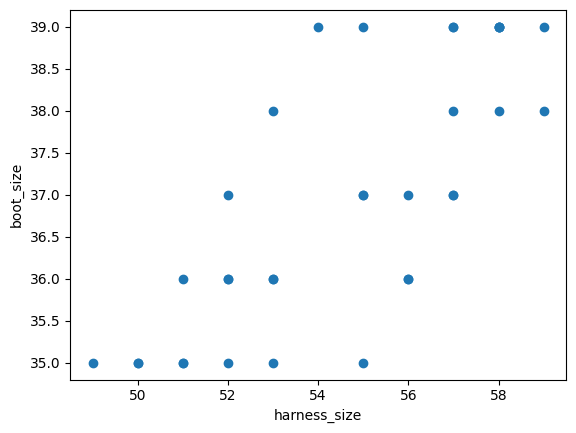

In [40]:
# Load and prepare matplotlib to use for plotting graphs
import matplotlib.pyplot as plt

# Show a graph of harness size by boot size:
plt.scatter(data_smaller_paws['harness_size'], data_smaller_paws['boot_size'])

# add labels
plt.xlabel('harness_size')
plt.ylabel('boot_size')


#### Create New column

The preceding graph shows the relationship we want to investigate for our store, but some customers might want harness-size lists in inches, not centimeters. How can we view these harness sizes in imperial units?

To do this, we need to create a new column called harness_size_imperial and put that on the X axis instead.

Creating new columns uses very similar syntax to what we've seen before.

In [41]:
# Convert harness sizes from metric to imperial units 
# and save the result to a new column

data_smaller_paws['harness_size_imperial'] = data_smaller_paws['harness_size'] / 2.54


Text(0, 0.5, 'boot_size')

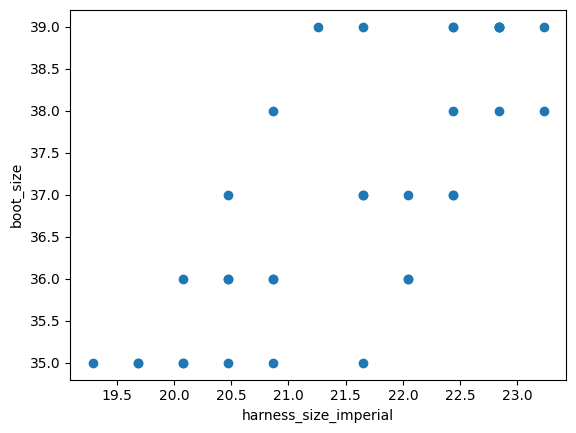

In [42]:
# Show a graph of harness size in imperial units
plt.scatter(data_smaller_paws['harness_size_imperial'], data_smaller_paws['boot_size'])
plt.xlabel('harness_size_imperial')
plt.ylabel('boot_size')


### How to use a model
https://learn.microsoft.com/en-us/training/modules/introduction-to-machine-learning/6-test-models

#### training
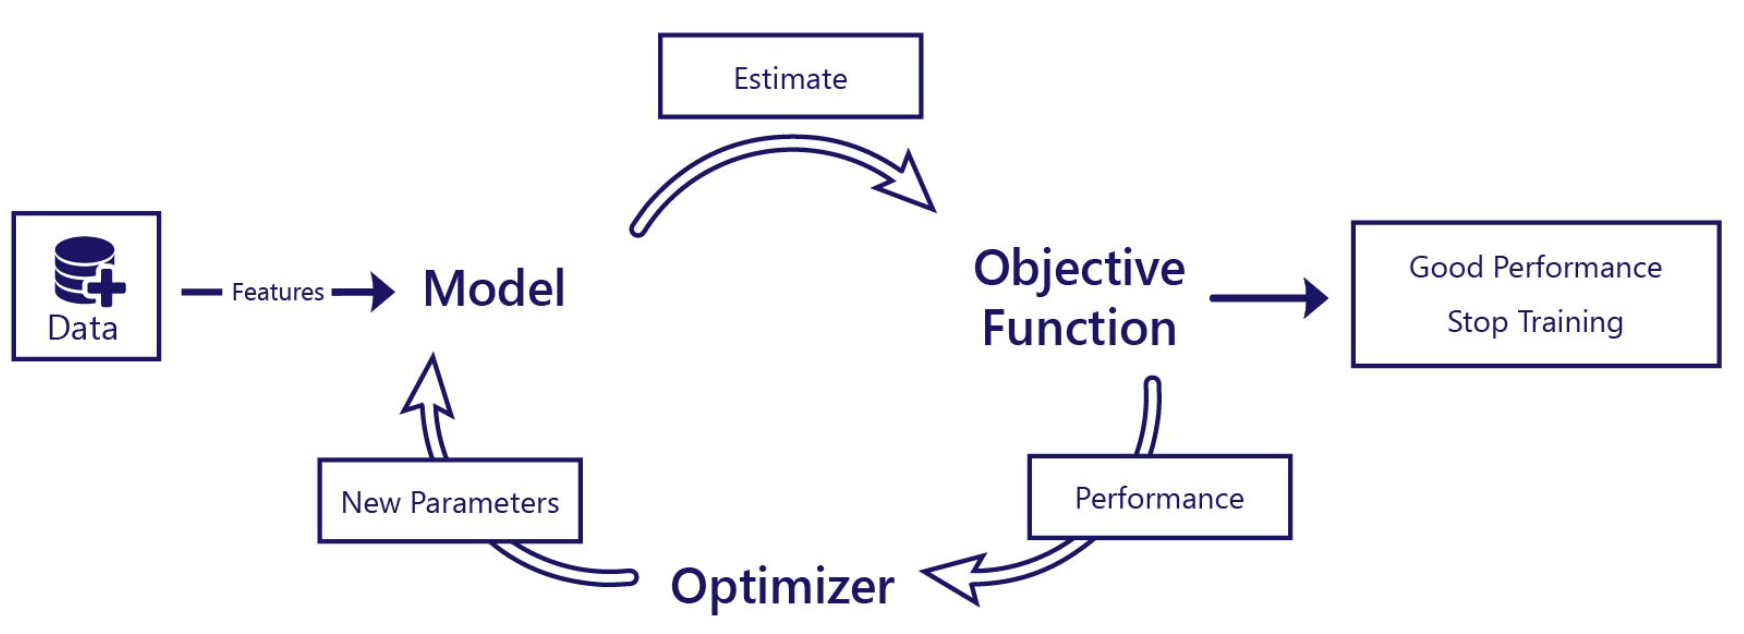

features - harness size
label - boot size

### Exercise - Use machine learning models

In [43]:
# Load a file containing dog's boot and harness sizes
data = pandas.read_csv('doggy-boot-harness.csv')

# Print the first few rows
data.head()


,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


#### Create and train a model

In [44]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'boot_size ~ harness_size', data = data).fit()
print('model trained')


model trained


Save and load the model

In [45]:
import joblib

model_filename = './avalanche_dog_boot_model.pkl'
joblib.dump(model, model_filename)

print('Model saved as pkl file!')


Model saved as pkl file!


Load model

In [47]:
model_loaded = joblib.load(model_filename)
print(model_loaded.params)


Intercept       5.719110
harness_size    0.585925
dtype: float64


#### Put it together
On our website, we want to take the harness of our customer's dog, then calculate their dog's boot size using the model that we've already trained.

Let's put everything here together to make a function that loads the model from disk, then uses it to predict our customer's dog's boot size.

In [48]:
# Let's write a function that loads and uses our model
def load_model_and_predict(harness_size):
    '''
    This function loads a pretrained model. It uses the model
    with the customer's dog's harness size to predict the size of
    boots that will fit that dog.

    harness_size: The dog harness size, in cm 
    '''

    # Load the model from file and print basic information about it
    loaded_model = joblib.load(model_filename)

    print('we have loaded the model with the following parameters: ')
    print(loaded_model.params)

    # prepare data for model
    inputs = {'harness_size' : [harness_size]}

    # use model to make a prediction
    predicted_boot_size = loaded_model.predict(inputs)[0]

    return predicted_boot_size



In [49]:
# practice using the model

predicted_boot_size = load_model_and_predict(45)

print(f'Predicted dog boot size: {predicted_boot_size}')


we have loaded the model with the following parameters: 
Intercept       5.719110
harness_size    0.585925
dtype: float64
Predicted dog boot size: 32.08575356590478


#### Real-world use
We've done it; we can predict an avalanche dog's boot size based on the size of their harness. Our last step is to use this to warn people if they might be buying the wrong size doggy boots.

As an example, we make a function that accepts the harness size and the size of the boots selected, then returns a message for the customer. We'd integrate this function into our online store.

In [50]:
def check_size_of_boots(selected_harness_size, selected_boot_size):
    '''
    Calculates whether the customer has chosen a pair of doggy boots that 
    are a sensible size. This works by estimating the dog's actual boot 
    size from their harness size.

    This returns a message for the customer that should be shown before
    they complete their payment 

    selected_harness_size: The size of the harness the customer wants to buy
    selected_boot_size: The size of the doggy boots the customer wants to buy
    '''

    # Estimate the customer's dog's boot size
    estimated_boot_size = load_model_and_predict(selected_harness_size)

    # Round to the nearest whole number because we don't sell partial sizes
    estimated_boot_size = int(round(estimated_boot_size))

    # Check if the boot size selected is appropriate
    if selected_boot_size == estimated_boot_size:
        # the selected boots are ok
        return f'Great choice! We think the boots will fit your dog well!'
    
    if selected_boot_size < estimated_boot_size:
        # Selected boots might be too small 
        return "The boots you have selected might be TOO SMALL for a dog as "\
               f"big as yours. We recommend a doggy boots size of {estimated_boot_size}."

    if selected_boot_size > estimated_boot_size:
        # Selected boots might be too big 
        return "The boots you have selected might be TOO BIG for a dog as "\
               f"small as yours. We recommend a doggy boots size of {estimated_boot_size}."


In [53]:

# Practice using our new warning system
check_size_of_boots(selected_harness_size=50, selected_boot_size=25)


we have loaded the model with the following parameters: 
Intercept       5.719110
harness_size    0.585925
dtype: float64


'The boots you have selected might be TOO SMALL for a dog as big as yours. We recommend a doggy boots size of 35.'